## Import of libraries needed to run this project

In [772]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
from sqlite3 import connect
conn = connect(':memory:')


## The following sections of code will pull in data, clean the data, and then execute various operations to prepare the data for visualizations

### Reading in data

In [773]:
# Step to read in weather data and pizza data csv files from the data directory
weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)
pizza_file = pd.read_csv("data/alexandria_pizza_data.csv", low_memory=False)

# Reading in a second 'golden' copy that can be used for basic calculations with original numbers
gold_weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)

In [774]:
# Sample output of weather file to show successful read of file
weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,42,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,33,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,44,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,41,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,35,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [775]:
# Sample output of pizza date file to show successful read of file
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,OrdVoidDate,OrdTaxExemptID,OrdOnlineOrderID,PmtType
0,3/1/2021,Monday,3,19.60,1,NaN,NaN,NaN,3
1,3/1/2021,Monday,2,20.74,3,NaN,NaN,NaN,3
2,3/1/2021,Monday,5,20.97,1,NaN,NaN,NaN,3
3,3/1/2021,Monday,6,9.99,1,NaN,NaN,NaN,3
4,3/1/2021,Monday,10,26.27,1,NaN,NaN,NaN,3


### Cleaning and Prepping Data

In [776]:
# Adding step to round values for early basic calculations
gold_weather_file.tempmax = gold_weather_file.tempmax.round(-1) 
gold_weather_file.precip = gold_weather_file.precip.round(2)

# Renaming column names to reflect these as "adjusted" and to prevent confusion from original values
weather_file.rename(columns={"tempmax":"adj_tempmax", "precip":"adj_precip"}, inplace=True)

# Sample readout to confirm the above changes were successful
weather_file.head()

,name,datetime,adj_tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,42,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,33,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,44,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,41,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,35,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [777]:
# Cleaning data ahead of the merge to limit the amount of data in our merged dataframe
pizza_file.drop(['OrdVoidDate', 'OrdTaxExemptID', 'OrdOnlineOrderID', 'PmtType', 'OrdServiceType'],axis=1,inplace=True)
weather_file.drop(['name', 'icon', 'stations', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin', 'humidity', 'dew'],axis=1,inplace=True)
gold_weather_file.drop(['name', 'icon', 'stations', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin', 'humidity', 'dew'],axis=1,inplace=True)


# Sample readout of pizza data file to ensure data looks as expected
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal
0,3/1/2021,Monday,3,19.60
1,3/1/2021,Monday,2,20.74
2,3/1/2021,Monday,5,20.97
3,3/1/2021,Monday,6,9.99
4,3/1/2021,Monday,10,26.27


In [778]:
# Sample readout of weather data file to ensure data looks as expected
weather_file.head()

,datetime,adj_tempmax,temp,adj_precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,3/1/2021,55,42,0.031,100,8.33,rain,0.0,0.0,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,3/2/2021,44,33,0.000,0,0.00,NaN,0.0,0.0,NaN,8.9,49.6,1026.0,0.5,9.9,197.2,17.1,7,NaN
2,3/3/2021,62,44,0.000,0,0.00,NaN,0.0,0.0,19.3,13.6,232.9,1017.5,0.0,9.9,194.3,16.6,7,NaN
3,3/4/2021,52,41,0.000,0,0.00,NaN,0.0,0.0,25.7,16.4,358.6,1021.9,1.3,9.9,197.0,16.9,7,NaN
4,3/5/2021,47,35,0.000,0,0.00,NaN,0.0,0.0,20.8,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN


In [779]:
# Sample readout of gold weather data file to ensure data looks as expected
gold_weather_file.head()

,datetime,tempmax,temp,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,3/1/2021,60,42,0.03,100,8.33,rain,0.0,0.0,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,3/2/2021,40,33,0.00,0,0.00,NaN,0.0,0.0,NaN,8.9,49.6,1026.0,0.5,9.9,197.2,17.1,7,NaN
2,3/3/2021,60,44,0.00,0,0.00,NaN,0.0,0.0,19.3,13.6,232.9,1017.5,0.0,9.9,194.3,16.6,7,NaN
3,3/4/2021,50,41,0.00,0,0.00,NaN,0.0,0.0,25.7,16.4,358.6,1021.9,1.3,9.9,197.0,16.9,7,NaN
4,3/5/2021,50,35,0.00,0,0.00,NaN,0.0,0.0,20.8,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN


In [780]:
# Adjusting date columns from CSV's to be in format compatible with matplotlib
pizza_file['BusDate'] = pd.to_datetime(pizza_file['BusDate'])
weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])
gold_weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])

# Sample readout of data to ensure changes were successful
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal
0,2021-03-01,Monday,3,19.60
1,2021-03-01,Monday,2,20.74
2,2021-03-01,Monday,5,20.97
3,2021-03-01,Monday,6,9.99
4,2021-03-01,Monday,10,26.27


### Merging Data

In [781]:
# Creating 2 combined datasets for use throughout the project. First one is 'gold', which will contain original data only
# Second dataset has adjusted/normailzed values for 'DailySum', 'tempmax' and 'precip' to show correlation with sales data
gold_combined_dataset = pizza_file.merge(gold_weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))
combined_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))

# Adding the daily sum total to the dataframes to allow for simpler visualization
combined_dataset['adj_DailySum'] = combined_dataset.groupby('BusDate')['OtotSubTotal'].transform('sum')
gold_combined_dataset['DailySum'] = gold_combined_dataset.groupby('BusDate')['OtotSubTotal'].transform('sum')

# Normalizing data for more accurate visualization
combined_dataset['adj_DailySum'] = (combined_dataset['adj_DailySum']-combined_dataset['adj_DailySum'].mean())/combined_dataset['adj_DailySum'].std()
combined_dataset['adj_tempmax'] = (combined_dataset['adj_tempmax']-combined_dataset['adj_tempmax'].mean())/combined_dataset['adj_tempmax'].std()
combined_dataset['adj_precip'] = (combined_dataset['adj_precip']-combined_dataset['adj_precip'].mean())/combined_dataset['adj_precip'].std()

#Reading dataframes into SQL for use with slicing data for visualization
combined_dataset.to_sql(name='combined_db', con=conn)
gold_combined_dataset.to_sql(name='gold_db', con=conn)
pizza_file.to_sql(name='pizza_db', con=conn)
weather_file.to_sql(name='weather_db', con=conn)

# Sample readout of 1 dataset to ensure results are as expected. 
combined_dataset.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,datetime,adj_tempmax,temp,adj_precip,precipprob,precipcover,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,adj_DailySum
0,2021-03-01,Monday,3,19.60,2021-03-01,-0.776141,42,-0.296236,100,8.33,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,-1.397463
1,2021-03-01,Monday,2,20.74,2021-03-01,-0.776141,42,-0.296236,100,8.33,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,-1.397463
2,2021-03-01,Monday,5,20.97,2021-03-01,-0.776141,42,-0.296236,100,8.33,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,-1.397463
3,2021-03-01,Monday,6,9.99,2021-03-01,-0.776141,42,-0.296236,100,8.33,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,-1.397463
4,2021-03-01,Monday,10,26.27,2021-03-01,-0.776141,42,-0.296236,100,8.33,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,-1.397463


## Data Sampling and Simple Visualizations

In [782]:
# This cell will be used to try to sample the data and show various counts
orders_per_day = combined_dataset.DayofWeek.value_counts()
orders_per_day

DayofWeek
Friday       20113
Saturday     18462
Sunday       13451
Thursday     11603
Wednesday    10712
Tuesday       9945
Monday        9200
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders per Day of Week'}, xlabel='Day of Week', ylabel='Orders'>

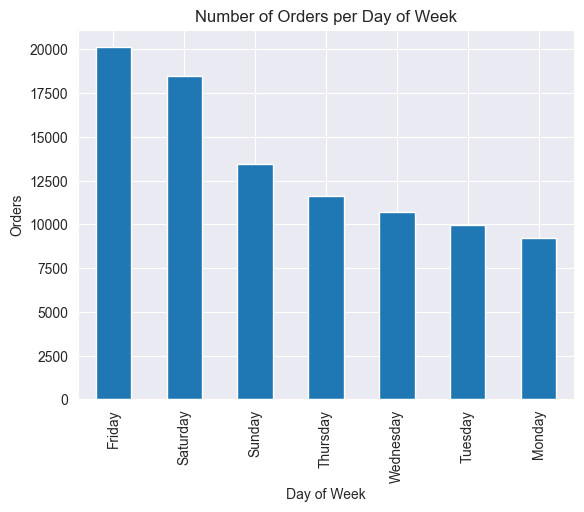

In [783]:
# Simple visualization to show the number of orders per day of the week 
orders_per_day.plot(kind="bar", xlabel='Day of Week', ylabel='Orders', title='Number of Orders per Day of Week')

### *Visualization Summary:*

*While this chart was not surprising, it was an early indication that weekend pizza consumption was strong enough to skew just about any correlation results. You will see as the project continues that the skewed data led me to break most of the future analysis down to either weekday/weekend or per individual day.* 

In [784]:
# Determining the distribution of pizza orders per average daily temperature, rounded to the nearest 10 degrees
# Note: this is using the gold dataset, so it can show actual temperature values
orders_per_avgtemp = gold_combined_dataset.tempmax.value_counts()
orders_per_avgtemp

tempmax
80    30492
60    17622
70    12580
90    12148
50     9169
40     7845
30     2681
20      873
10       76
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders per Temperature'}, xlabel='Temperature', ylabel='Orders'>

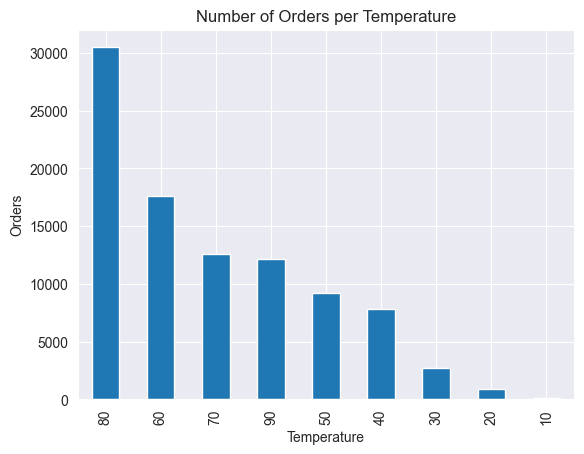

In [785]:
# Visualization of the above command to show number of orders per outside average temperature, rounded to the nearest 10 degrees
orders_per_avgtemp.plot(kind="bar", xlabel='Temperature', ylabel='Orders', title='Number of Orders per Temperature')

### *Visualization Summary:*

*This visualization was a little surpirsing to me. I anticipated there to be an inverse correlation to temperature - meaning that we may see more pizza orders as the temperature declines. The data here seems to suggest that customers prefer to order pizza when the weather is mostly comfortable outside.*

In [786]:
# Determining the distribution of pizza orders per amount of daily precipitation (rounded to the nearest 1/100th of an inch) 
# to see if there is a correlation 
# Note: this is using the gold dataset, so it can show actual precipitation values
orders_per_precip = gold_combined_dataset.precip.value_counts()

# I was surprised by what I saw in the sampling below, so the data was written to a CSV for further analysis.
orders_per_precip.to_csv("data/OrdersPrecip.csv")
orders_per_precip

# It seems there is almost no correlation between the amount of precipitation in a day and how many customers order pizza - at least
# not in how the data looks in raw form.

precip
0.00    57199
0.01     5123
0.02     2846
0.04     1675
0.07     1390
        ...  
0.73       62
0.29       62
1.37       58
0.54       53
0.84       50
Name: count, Length: 87, dtype: int64

## Building dataframes and creating more complex visualizations

<Axes: title={'center': 'Revenue/Temp/Precip Daily Trend (Full Data)'}, xlabel='Day Number'>

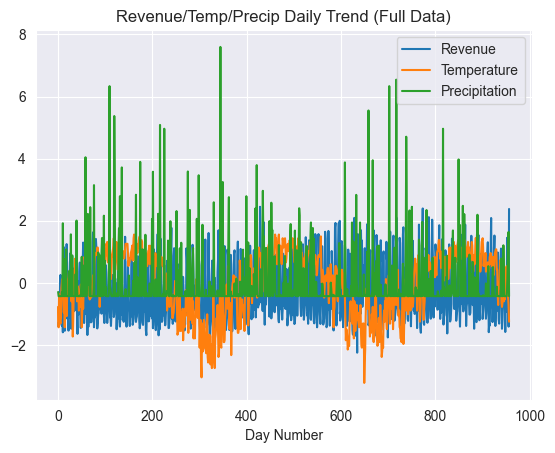

In [787]:
# Building the dataframe to show overall correlation of pizza sales with temperature and precipitation. All 3 values were normalized 
# to allow them to show up on the graph for trend analysis.  
daily_sales_df = pd.read_sql('select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db', conn)
daily_sales_df.plot(xlabel='Day Number', title="Revenue/Temp/Precip Daily Trend (Full Data)")

### *Visualization Summary:*

*The graph above did not show any obvious signs of correlation between pizza sales and the amount of precipitation in a day. Deciding to leave precipitation in the analysis to see what the breakdown by day of the week shows.*

*This graph also showed possible consistent correlation at points between pizza sales and temperature. The graphs rise together to a certain point and then they separate for a time before coming back together again to fall. The visualizations a few cells below will attempt to review that correlation by day of the week.* 

<Axes: title={'center': 'Revenue Average and Distribution by Day of Week'}, xlabel='Day of Week', ylabel='Revenue'>

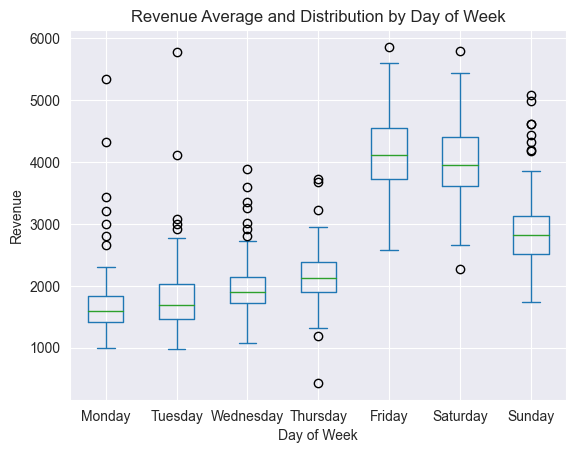

In [788]:
# Creating dataframes for analysis of daily pizza sales per day - sales data only
mon_df = pd.read_sql("select distinct BusDate, DailySum as 'Monday' from gold_db where DayofWeek = 'Monday'", conn)
mon_df = mon_df.drop('BusDate', axis=1)
tue_df = pd.read_sql("select distinct BusDate, DailySum as 'Tuesday' from gold_db where DayofWeek = 'Tuesday'", conn)
tue_df = tue_df.drop('BusDate', axis=1)
wed_df = pd.read_sql("select distinct BusDate, DailySum as 'Wednesday' from gold_db where DayofWeek = 'Wednesday'", conn)
wed_df = wed_df.drop('BusDate', axis=1)
thu_df = pd.read_sql("select distinct BusDate, DailySum as 'Thursday' from gold_db where DayofWeek = 'Thursday'", conn)
thu_df = thu_df.drop('BusDate', axis=1)
fri_df = pd.read_sql("select distinct BusDate, DailySum as 'Friday' from gold_db where DayofWeek = 'Friday'", conn)
fri_df = fri_df.drop('BusDate', axis=1)
sat_df = pd.read_sql("select distinct BusDate, DailySum as 'Saturday' from gold_db where DayofWeek = 'Saturday'", conn)
sat_df = sat_df.drop('BusDate', axis=1)
sun_df = pd.read_sql("select distinct BusDate, DailySum as 'Sunday' from gold_db where DayofWeek = 'Sunday'", conn)
sun_df = sun_df.drop('BusDate', axis=1)

# Combining dataframes to use for visualizations below
week_df = pd.concat([mon_df, tue_df, wed_df, thu_df, fri_df, sat_df, sun_df], axis=1)
weekday_df = pd.concat([mon_df, tue_df, wed_df, thu_df], axis=1)
weekend_df = pd.concat([fri_df, sat_df, sun_df], axis=1)

# Visualization command 
week_df.plot(kind='box', xlabel='Day of Week', ylabel='Revenue', title='Revenue Average and Distribution by Day of Week')

### *Visualization Summary:*

*The chart above was an interesting way to show the average revenue distribution for each day of the week, the range of values for each day, and the outliers where they exist.*

<Axes: title={'center': 'Daily Revenue Trend (Weekend)'}, xlabel='Day Number', ylabel='Revenue'>

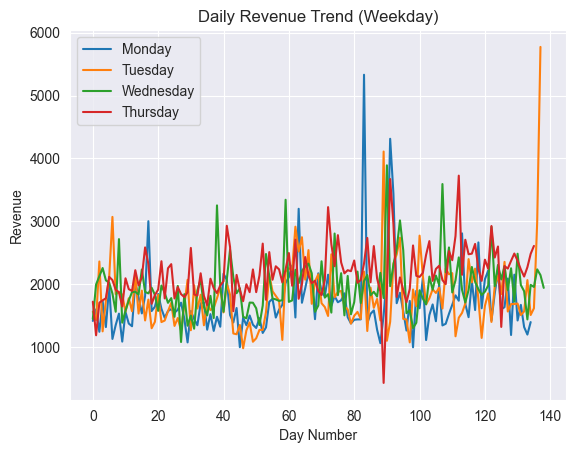

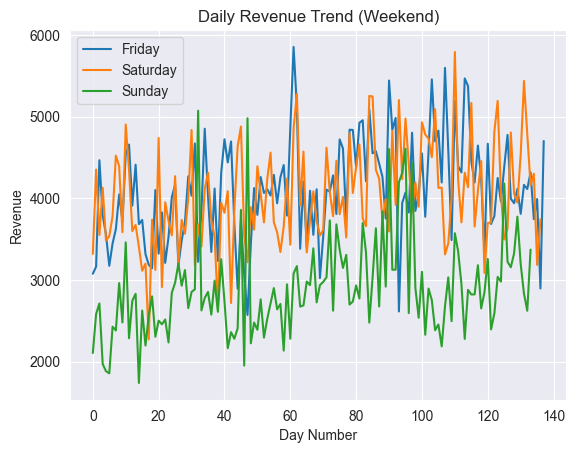

In [789]:
# Visualizations to show revenue per day over time - this was split into weekday and weekend for easier readability of the graph
weekday_df.plot(kind="line", xlabel='Day Number', ylabel='Revenue', title='Daily Revenue Trend (Weekday)')
weekend_df.plot(kind="line", xlabel='Day Number', ylabel='Revenue', title='Daily Revenue Trend (Weekend)')

### *Visualization Summary:*

*The 2 graphs above were a split of weekday/weekend sales data over time. It is interesting to see the sales rise and fall compared to other days of the week.* 

*One takeaway from the data - the highest Monday (blue) and Tuesday (orange) spikes in the top graph are from Halloween - one of the most popular days of the year for pizza restaurants. The 3rd Halloween spike is in the lower chart since Halloween in 2021 was on a Sunday (green).*

<Axes: title={'center': 'Revenue & Temperature Daily Trend (Sunday)'}, xlabel='Day Number'>

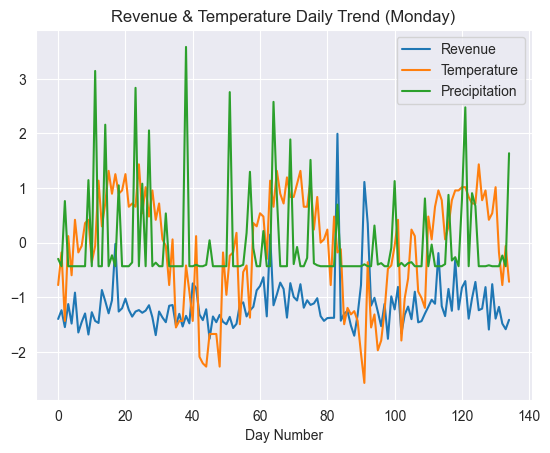

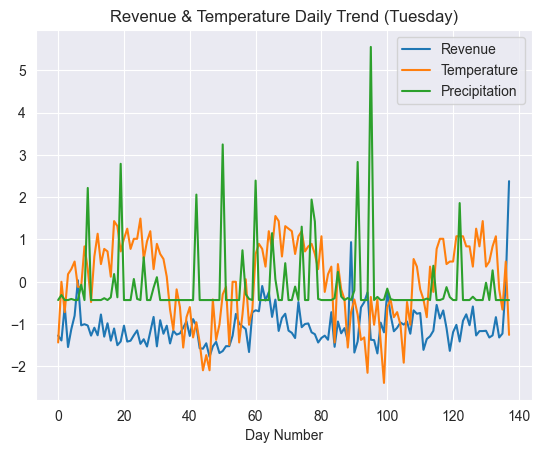

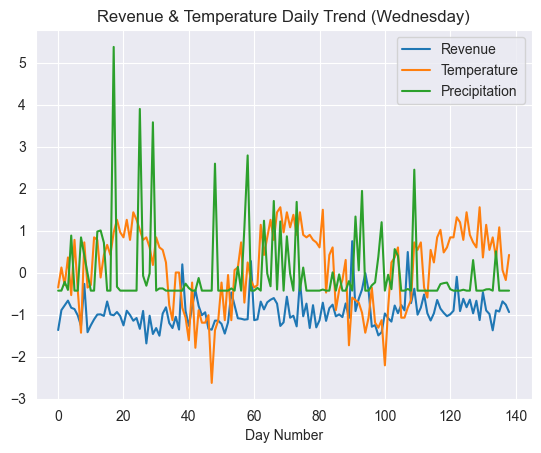

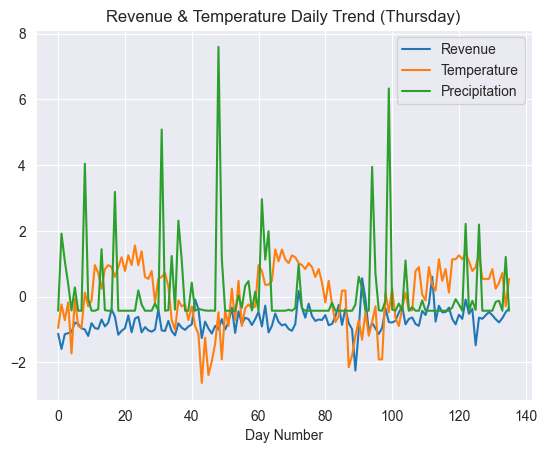

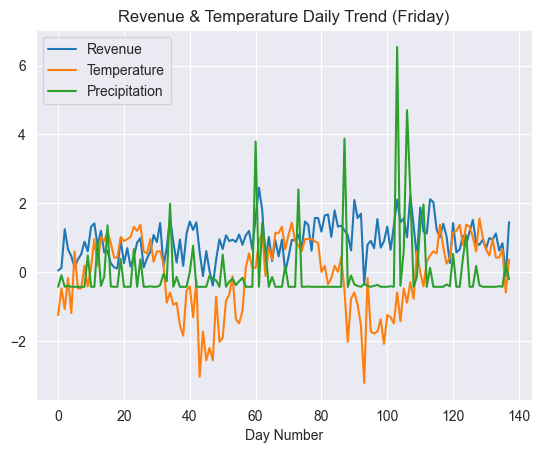

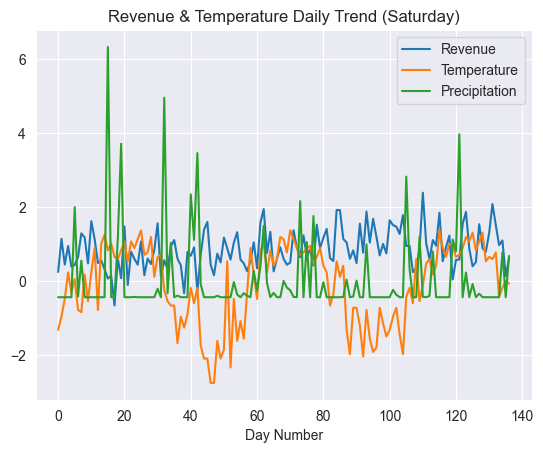

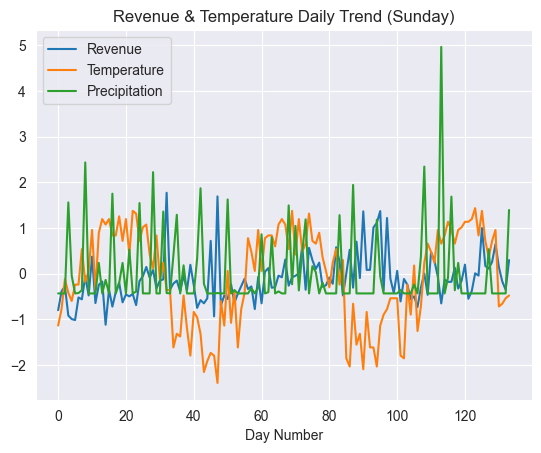

In [790]:
# Building dataframes to detect any correlation with daily sales data, temperature, and precipitation. Similar to above, the values have been
# normalized to allow them to show up on the graph for trend analysis.
monday_sales_df = pd.read_sql("select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db where DayofWeek='Monday'", conn)
tuesday_sales_df = pd.read_sql("select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db where DayofWeek='Tuesday'", conn)
wednesday_sales_df = pd.read_sql("select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db where DayofWeek='Wednesday'", conn)
thursday_sales_df = pd.read_sql("select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db where DayofWeek='Thursday'", conn)
friday_sales_df = pd.read_sql("select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db where DayofWeek='Friday'", conn)
saturday_sales_df = pd.read_sql("select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db where DayofWeek='Saturday'", conn)
sunday_sales_df = pd.read_sql("select distinct BusDate, adj_DailySum as Revenue, adj_tempmax as Temperature, adj_precip as Precipitation from combined_db where DayofWeek='Sunday'", conn)

# Visualization to detect any correlation with daily sales data and temperature
monday_sales_df.plot(xlabel='Day Number', title="Revenue & Temperature Daily Trend (Monday)")
tuesday_sales_df.plot(xlabel='Day Number', title="Revenue & Temperature Daily Trend (Tuesday)")
wednesday_sales_df.plot(xlabel='Day Number', title="Revenue & Temperature Daily Trend (Wednesday)")
thursday_sales_df.plot(xlabel='Day Number', title="Revenue & Temperature Daily Trend (Thursday)")
friday_sales_df.plot(xlabel='Day Number', title="Revenue & Temperature Daily Trend (Friday)")
saturday_sales_df.plot(xlabel='Day Number', title="Revenue & Temperature Daily Trend (Saturday)")
sunday_sales_df.plot(xlabel='Day Number', title="Revenue & Temperature Daily Trend (Sunday)")

### *Visualization Summary:*

*The breakdown of sales numbers per day of the week above continues to show only a very slight correlation between temperature rises and a rise in sales with the strongest of those appearing to be Monday and Tuesday with much less correlation starting on Wednesday. The remainder of the week appears to be largely uneffected by temperature and precipitation.* 

*The increase in precipitation looks a little more correlated to revenue at a couple points on each graph and most correlated on Sunday's but, even with that, still probably not enough to make any analyses with the data.*

<Axes: title={'center': 'Daily Orders per Temperature'}, xlabel='Temperature', ylabel='Number of Orders'>

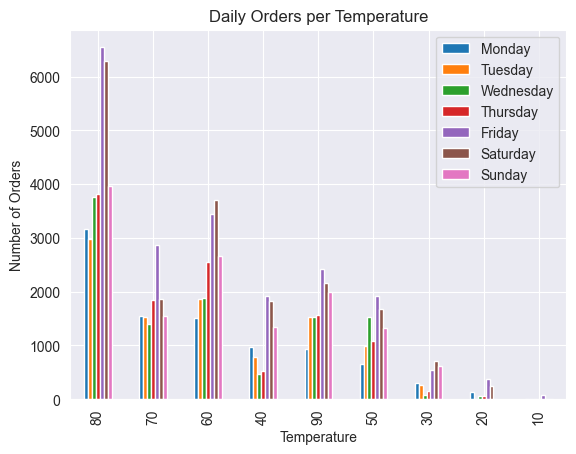

In [791]:
# Steps to create dataframes for daily pizza sales per temperature, rounded to the nearest 10 degrees

# Limiting the columns used to only those required for visualization 
gold_lim_data = gold_combined_dataset[["BusDate", "DayofWeek", "tempmax"]]

# Dataframes created for each day of the week
fri_sel = (gold_lim_data.DayofWeek == "Friday")
fri_gold = gold_lim_data[fri_sel]
sat_sel = (gold_lim_data.DayofWeek == "Saturday")
sat_gold = gold_lim_data[sat_sel]
sun_sel = (gold_lim_data.DayofWeek == "Sunday")
sun_gold = gold_lim_data[sun_sel]
mon_sel = (gold_lim_data.DayofWeek == "Monday")
mon_gold = gold_lim_data[mon_sel]
tue_sel = (gold_lim_data.DayofWeek == "Tuesday")
tue_gold = gold_lim_data[tue_sel]
wed_sel = (gold_lim_data.DayofWeek == "Wednesday")
wed_gold = gold_lim_data[wed_sel]
thu_sel = (gold_lim_data.DayofWeek == "Thursday")
thu_gold = gold_lim_data[thu_sel]

#Grouping data to show most popular temperature by day
mon_gold_avgtemp = mon_gold.tempmax.value_counts()
tue_gold_avgtemp = tue_gold.tempmax.value_counts()
wed_gold_avgtemp = wed_gold.tempmax.value_counts()
thu_gold_avgtemp = thu_gold.tempmax.value_counts()
fri_gold_avgtemp = fri_gold.tempmax.value_counts()
sat_gold_avgtemp = sat_gold.tempmax.value_counts()
sun_gold_avgtemp = sun_gold.tempmax.value_counts()

# Building dataframe to populate stacked bar chart to display orders per day at each temperature
overall_gold_avgtemp = pd.concat([mon_gold_avgtemp, tue_gold_avgtemp, wed_gold_avgtemp, thu_gold_avgtemp, fri_gold_avgtemp, sat_gold_avgtemp, sun_gold_avgtemp], axis=1)

# Renaming columns for proper labeling in the chart
overall_gold_avgtemp.columns = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Command to build visualization
overall_gold_avgtemp.plot(kind='bar', xlabel='Temperature', ylabel='Number of Orders', title="Daily Orders per Temperature")

### *Visualization Summary:*

*The graph above was intended to tease out any anomalies with the data - in other words, are comfortable temperatures the most popular regardless of the day of the week, or was the weekend data skewing the early results from above? As you can see 80, 60, and 70 degrees (respectively) appear to be the most popular temperatures for every day of the week.*

*Full disclosure - this is not what I was expecting when starting this project, but it was quite interesting to learn while examining the data.*